In [1]:
from QASMBench.interface.qiskit import QASMBenchmark
path = 'QASMBench'

category = 'medium'
# select only the circuits with the number of qubits in the list
num_qubits_list = list(range(3, 50))

# whether to remove the final measurement in the circuit
remove_final_measurements = True

# whether use qiskit.transpile() to transpile the circuits (note: must provide qiskit backend)
do_transpile = False

# arguments for qiskit.transpile(). backend should be provide at least
transpile_args = {}

bm = QASMBenchmark(path, category, num_qubits_list=num_qubits_list, remove_final_measurements=remove_final_measurements, do_transpile=do_transpile, **transpile_args)

[CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'qr'), 0),), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'qr'), 1),), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'qr'), 2),), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'qr'), 3),), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'qr'), 4),), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'qr'), 5),), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(

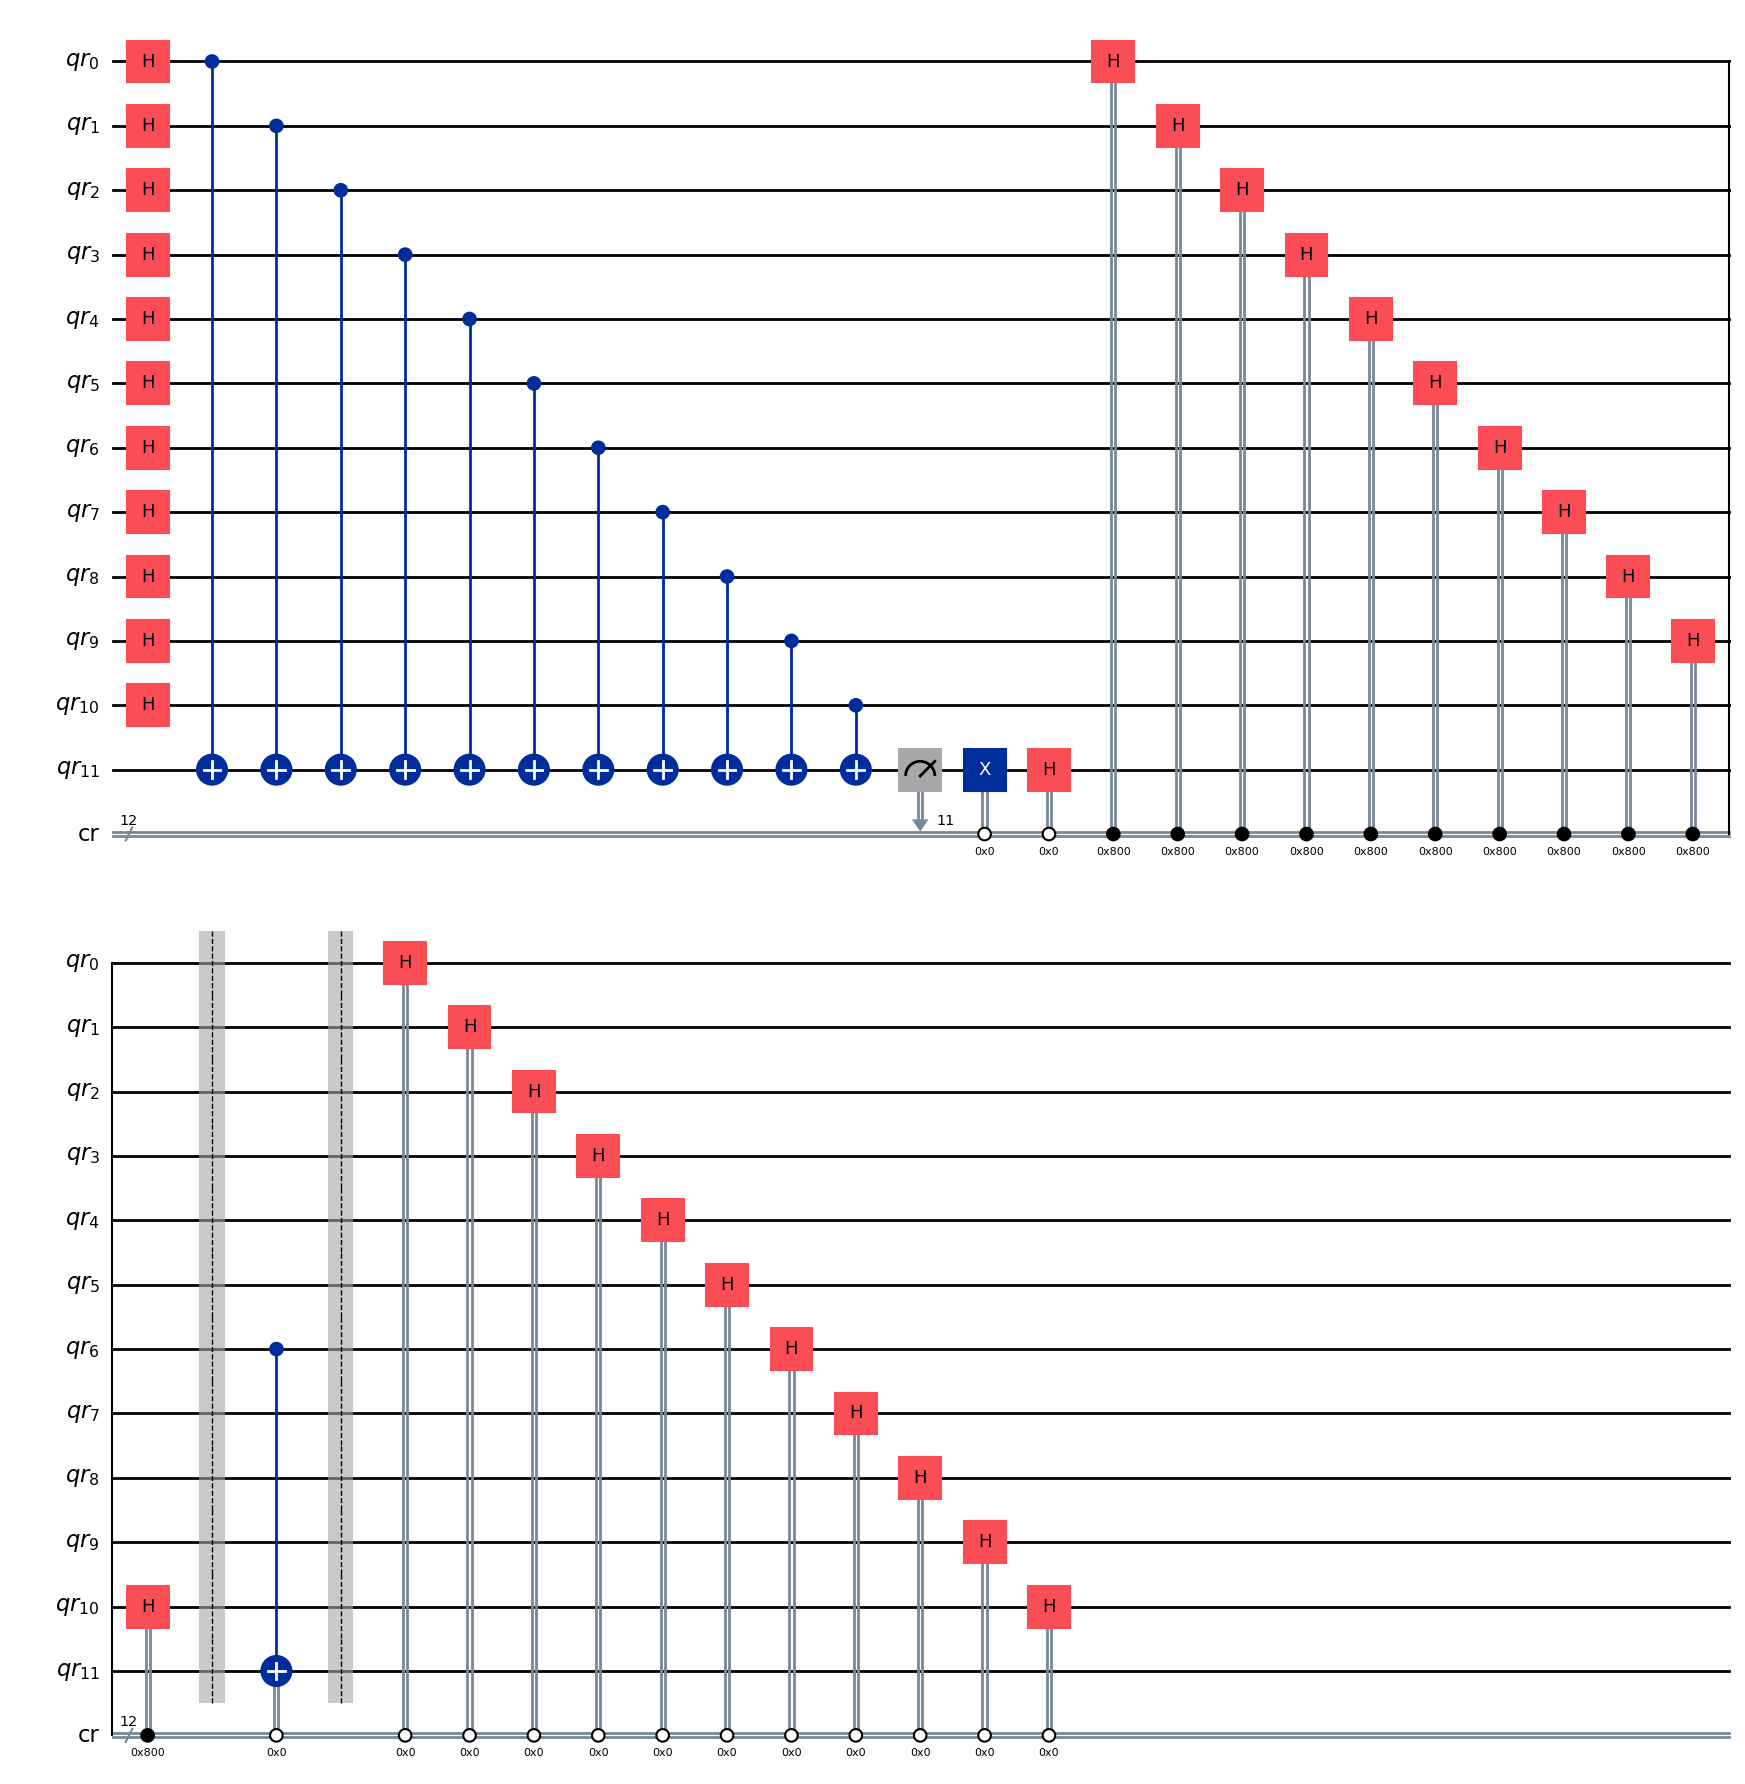

In [2]:
circuit = bm.get('cc_n12')
# from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# qreg = QuantumRegister(2, 'q')
# creg = ClassicalRegister(2, 'c')
# circuit = QuantumCircuit(qreg, creg)

# circuit.cx(qreg[0], qreg[1])

# circuit.measure(qreg[0], creg[0])
# circuit.x(qreg[1]).c_if(creg, 1)

print(circuit.data)

circuit.draw(output='mpl')

{0: [], 1: [{'type': 'group', 'root': 0, 'time': 1, 'sub-gates': [{'type': 'two-qubit', 'name': 'cx', 'qargs': [0, 11], 'qregs': ['qr', 'qr'], 'params': [], 'time': 1}]}], 2: [{'type': 'group', 'root': 1, 'time': 2, 'sub-gates': [{'type': 'two-qubit', 'name': 'cx', 'qargs': [1, 11], 'qregs': ['qr', 'qr'], 'params': [], 'time': 2}]}], 3: [{'type': 'group', 'root': 2, 'time': 3, 'sub-gates': [{'type': 'two-qubit', 'name': 'cx', 'qargs': [2, 11], 'qregs': ['qr', 'qr'], 'params': [], 'time': 3}]}], 4: [{'type': 'group', 'root': 3, 'time': 4, 'sub-gates': [{'type': 'two-qubit', 'name': 'cx', 'qargs': [3, 11], 'qregs': ['qr', 'qr'], 'params': [], 'time': 4}]}], 5: [{'type': 'group', 'root': 4, 'time': 5, 'sub-gates': [{'type': 'two-qubit', 'name': 'cx', 'qargs': [4, 11], 'qregs': ['qr', 'qr'], 'params': [], 'time': 5}]}], 6: [{'type': 'group', 'root': 5, 'time': 6, 'sub-gates': [{'type': 'two-qubit', 'name': 'cx', 'qargs': [5, 11], 'qregs': ['qr', 'qr'], 'params': [], 'time': 6}]}], 7: [{'ty

<Axes: >

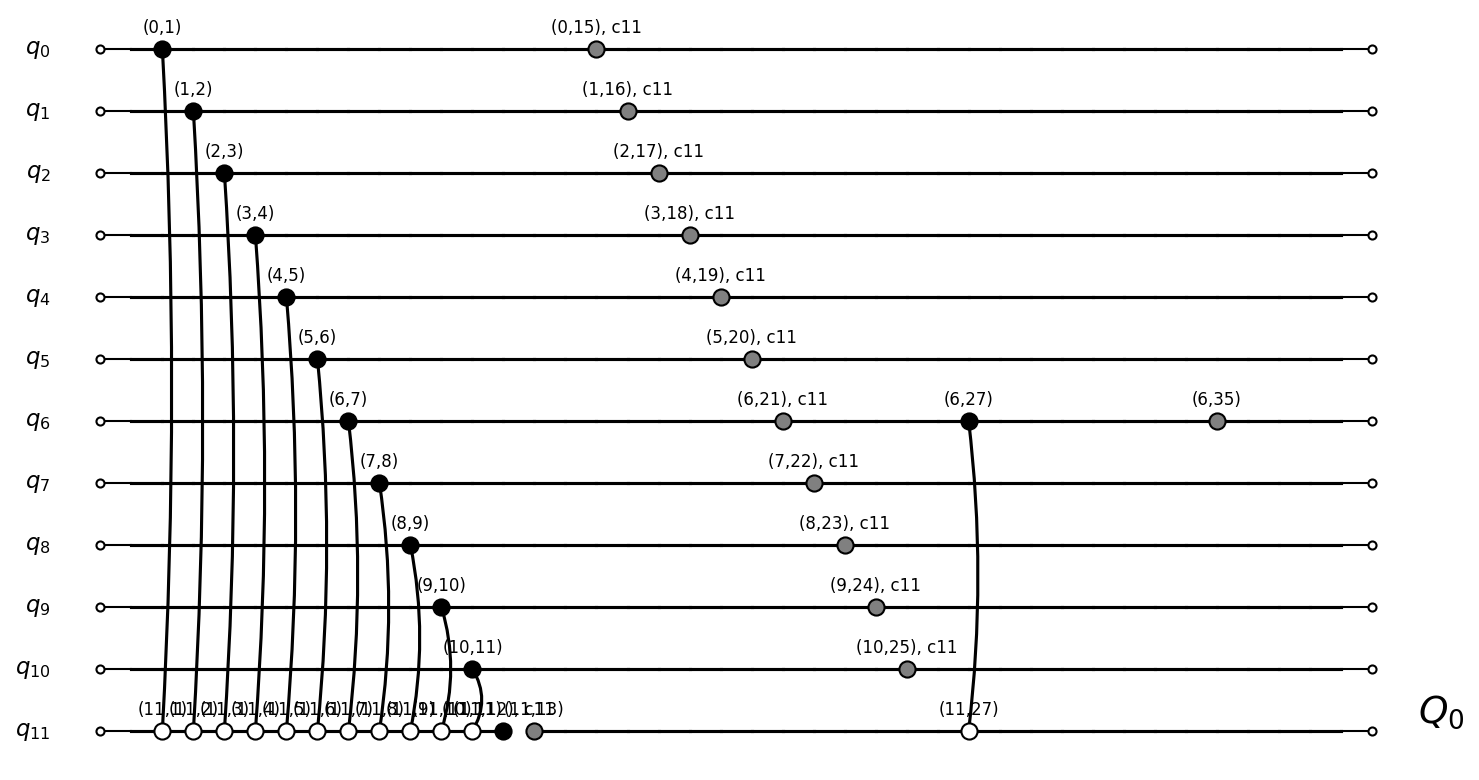

In [3]:
from disqco.graphs.QC_hypergraph import QuantumCircuitHyperGraph
%load_ext jupyter_tikz

hypergraph = QuantumCircuitHyperGraph(circuit)

print(circuit.depth())
print(hypergraph.depth)

for i, layer in hypergraph.layers.items():
    print(layer)

hypergraph.draw(output='mpl')

{0: [], 1: [{'type': 'group', 'root': 0, 'time': 1, 'sub-gates': [{'type': 'two-qubit', 'name': 'cx', 'qargs': [0, 11], 'qregs': ['qr', 'qr'], 'params': [], 'time': 1}]}], 2: [{'type': 'group', 'root': 1, 'time': 2, 'sub-gates': [{'type': 'two-qubit', 'name': 'cx', 'qargs': [1, 11], 'qregs': ['qr', 'qr'], 'params': [], 'time': 2}]}], 3: [{'type': 'group', 'root': 2, 'time': 3, 'sub-gates': [{'type': 'two-qubit', 'name': 'cx', 'qargs': [2, 11], 'qregs': ['qr', 'qr'], 'params': [], 'time': 3}]}], 4: [{'type': 'group', 'root': 3, 'time': 4, 'sub-gates': [{'type': 'two-qubit', 'name': 'cx', 'qargs': [3, 11], 'qregs': ['qr', 'qr'], 'params': [], 'time': 4}]}], 5: [{'type': 'group', 'root': 4, 'time': 5, 'sub-gates': [{'type': 'two-qubit', 'name': 'cx', 'qargs': [4, 11], 'qregs': ['qr', 'qr'], 'params': [], 'time': 5}]}], 6: [{'type': 'group', 'root': 5, 'time': 6, 'sub-gates': [{'type': 'two-qubit', 'name': 'cx', 'qargs': [5, 11], 'qregs': ['qr', 'qr'], 'params': [], 'time': 6}]}], 7: [{'ty

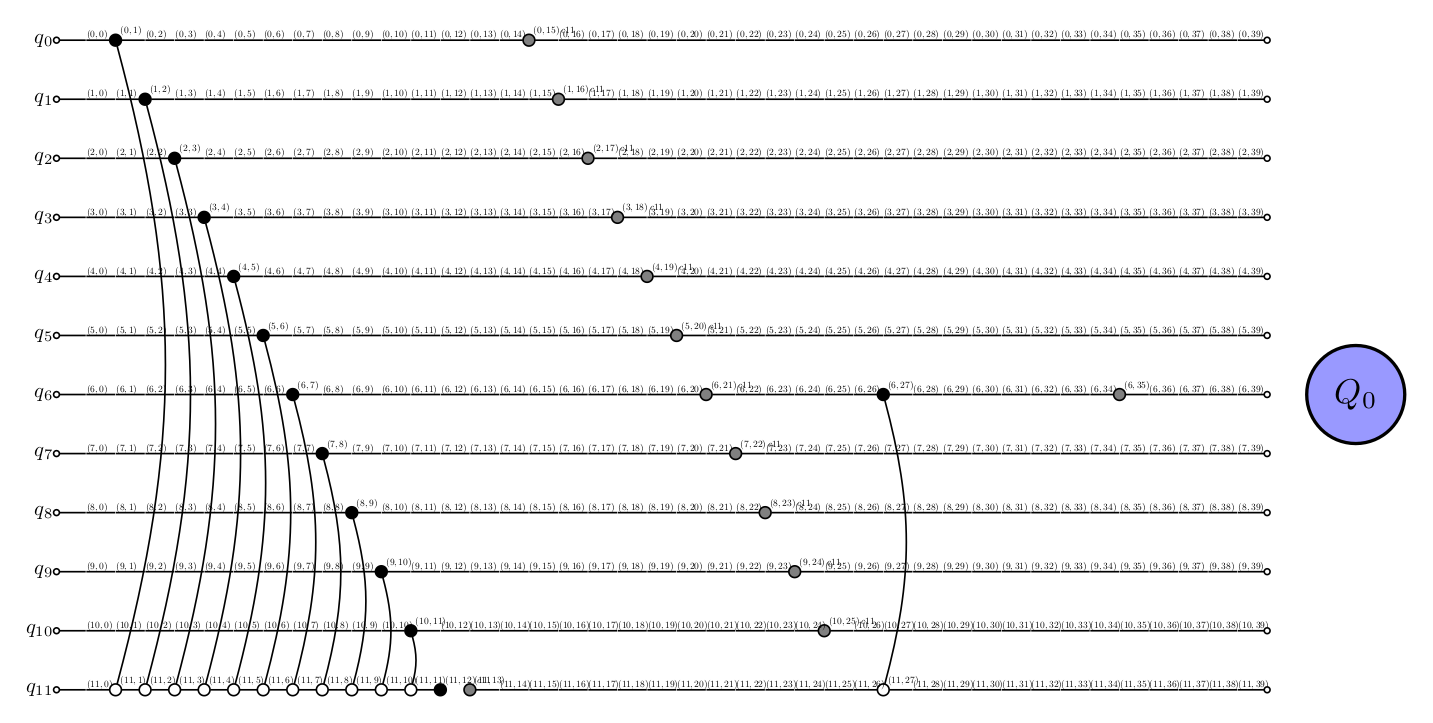

In [4]:
# Rebuild hypergraph to reflect updated layer extraction and labels
from importlib import reload
from disqco.utils import qiskit_to_op_list as q2l
reload(q2l)
from disqco.graphs import QC_hypergraph as qch
reload(qch)

hypergraph = qch.QuantumCircuitHyperGraph(circuit)
hypergraph.draw(output='tikz')